In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<ipython-input-3-49c82b8d3352>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_sorted, x='PredictedPoints', y='Driver', palette='cubehelix')


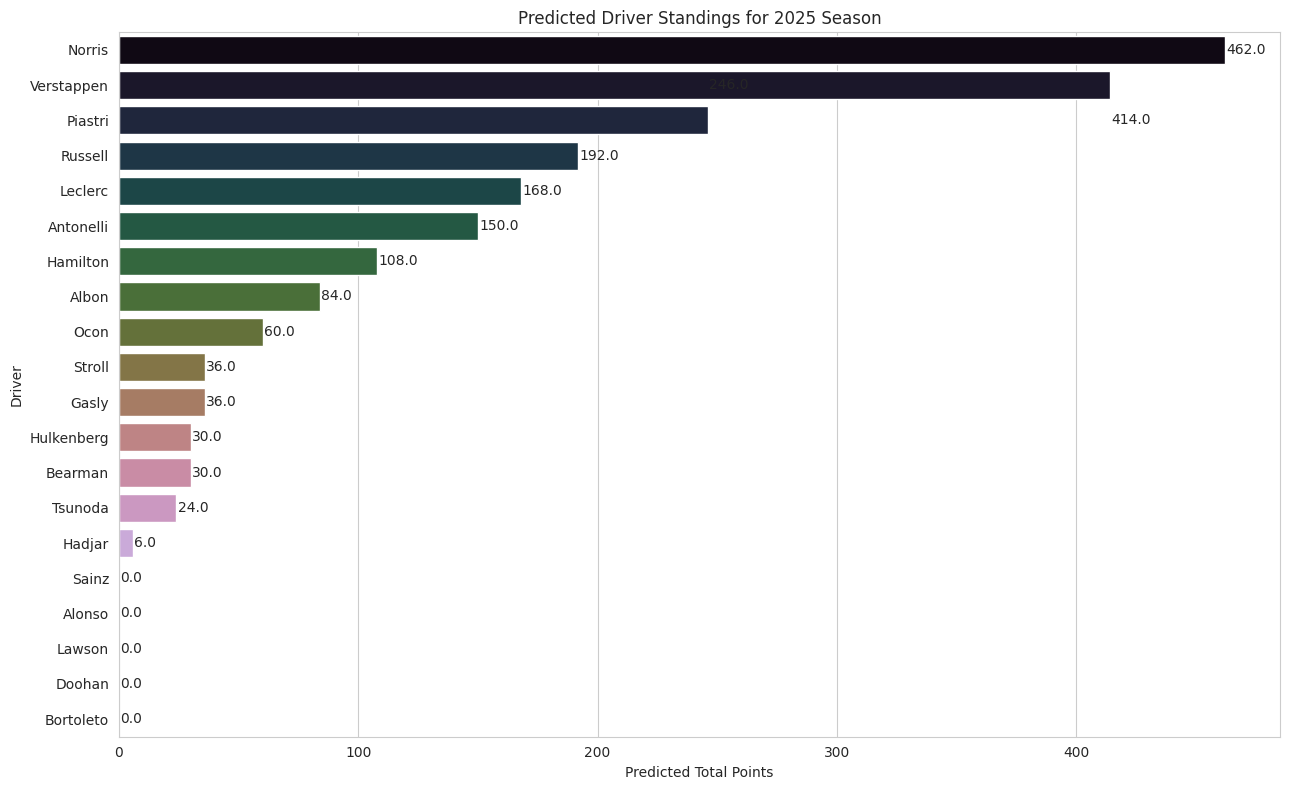

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data setup
drivers_data = {
    'Driver': ['Norris', 'Piastri', 'Verstappen', 'Russell', 'Leclerc', 'Antonelli', 'Hamilton', 'Albon', 'Ocon', 'Stroll',
               'Gasly', 'Hulkenberg', 'Bearman', 'Tsunoda', 'Hadjar', 'Sainz', 'Alonso', 'Lawson', 'Doohan', 'Bortoleto'],
    'Team': ['McLaren Mercedes', 'McLaren Mercedes', 'Red Bull Racing Honda RBPT', 'Mercedes', 'Ferrari', 'Mercedes', 'Ferrari',
             'Williams Mercedes', 'Alpine Renault', 'Aston Martin Aramco Mercedes', 'Alpine Renault', 'Haas Ferrari',
             'Ferrari', 'RB Honda RBPT', 'RB Honda RBPT', 'Ferrari', 'Aston Martin Aramco Mercedes', 'Kick Sauber Ferrari',
             'Alpine Renault', 'Kick Sauber Ferrari'],
    'Points': [77, 41, 69, 32, 28, 25, 18, 14, 10, 6, 6, 5, 5, 4, 1, 0, 0, 0, 0, 0],
    'RacesCompleted': [4] * 20
}

# Create DataFrame
df = pd.DataFrame(drivers_data)

# Calculate statistics
total_races = 24
df['AvgPointsPerRace'] = df['Points'] / df['RacesCompleted']
df['RemainingRaces'] = total_races - df['RacesCompleted']
df['AvgPointsPerRemainingRace'] = df['Points'] / df['RemainingRaces']
df['PredictedPoints'] = df['Points'] + df['AvgPointsPerRace'] * df['RemainingRaces']

# Sort by predicted points
df_sorted = df.sort_values(by='PredictedPoints', ascending=False)

# Plotting
plt.figure(figsize=(13, 8))
sns.set_style("whitegrid")
barplot = sns.barplot(data=df_sorted, x='PredictedPoints', y='Driver', palette='cubehelix')

# Annotate bars
for index, row in df_sorted.iterrows():
    barplot.text(row['PredictedPoints'] + 0.5, index, f"{row['PredictedPoints']:.1f}", va='center')

plt.title('Predicted Driver Standings for 2025 Season')
plt.xlabel('Predicted Total Points')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Data setup
drivers_data = {
    'Driver': ['Norris', 'Piastri', 'Verstappen', 'Russell', 'Leclerc', 'Antonelli', 'Hamilton', 'Albon', 'Ocon', 'Stroll',
               'Gasly', 'Hulkenberg', 'Bearman', 'Tsunoda', 'Hadjar', 'Sainz', 'Alonso', 'Lawson', 'Doohan', 'Bortoleto'],
    'Team': ['McLaren Mercedes', 'McLaren Mercedes', 'Red Bull Racing Honda RBPT', 'Mercedes', 'Ferrari', 'Mercedes', 'Ferrari',
             'Williams Mercedes', 'Alpine Renault', 'Aston Martin Aramco Mercedes', 'Alpine Renault', 'Haas Ferrari',
             'Ferrari', 'RB Honda RBPT', 'RB Honda RBPT', 'Ferrari', 'Aston Martin Aramco Mercedes', 'Kick Sauber Ferrari',
             'Alpine Renault', 'Kick Sauber Ferrari'],
    'Points': [77, 41, 69, 32, 28, 25, 18, 14, 10, 6, 6, 5, 5, 4, 1, 0, 0, 0, 0, 0],
    'RacesCompleted': [4] * 20
}

# Create DataFrame
df = pd.DataFrame(drivers_data)

# Calculate predicted final points
df['PredictedFinalPoints'] = df['Points'] + df['Points'] / df['RacesCompleted'] * (24 - df['RacesCompleted'])

# Define comparison function
def compare_driver(d1, d2):
    if d1 not in df['Driver'].values or d2 not in df['Driver'].values:
        return "One or both drivers not found."

    p1 = df.loc[df['Driver'] == d1, 'PredictedFinalPoints'].values[0]
    p2 = df.loc[df['Driver'] == d2, 'PredictedFinalPoints'].values[0]

    diff = round(abs(p1 - p2), 2)

    if p1 > p2:
        return f"{d1} is predicted to score {diff} more points than {d2}."
    elif p2 > p1:
        return f"{d2} is predicted to score {diff} more points than {d1}."
    else:
        return f"{d1} and {d2} are predicted to score the same number of points."

# Example usage
print(compare_driver("Norris", "Verstappen"))
d1 = input("Enter the first driver's name: ")
d2 = input("Enter the second driver's name: ")
if d1 in df['Driver'].values and d2 in df['Driver'].values:
    print(compare_driver(d1, d2))
else:
    print("One or both drivers not found.")

Norris is predicted to score 48.0 more points than Verstappen.
